In [27]:
import numpy as np
import pandas as pd
from copy import deepcopy

from sklearn.datasets import make_friedman1
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score as skl_r2

from realkd.rules import GradientBoostingRuleEnsemble
from realkd import evaluation
from realkd.patch import RuleFit

max_rules = 50

x_train, y_train = make_friedman1(n_samples=1000, n_features=7, noise=0.1, random_state=1)
x_test, y_test = make_friedman1(n_samples=5000, n_features=7, noise=0.1, random_state=2)

no_cols = np.size(x_train, 1)
col_names = ['X' + str(i + 1) for i in range(no_cols)]

x_train = pd.DataFrame(x_train, columns=col_names)
y_train = pd.Series(y_train)

x_test = pd.DataFrame(x_test, columns=col_names)
y_train = pd.Series(y_train)

r2_test = evaluation.r2(x_test, y_test)
r2_train = evaluation.r2(x_train, y_train)

In [3]:
def is_overfitting(len_v_perf, minimum_size = 10, rolling_window = 5):
    if len(len_v_perf) < minimum_size:
        return False
    else:
        old_score = len_v_perf.values[-rolling_window]
#        rolling_average = sum(len_v_perf.values[-(rolling_window):-1])/3
        current_score = len_v_perf.values[-1]
        return current_score < old_score

In [4]:
orb = GradientBoostingRuleEnsemble(max_rules=1, loss='squared', reg=10, max_col_attr=6, method='bestboundfirst')
orb.fit(x_train, y_train, verbose=1)
orb_len_v_perf_test = evaluation.ensemble_length_vs_perf(orb, r2_test)
orb_test_r2 = orb_len_v_perf_test.values[-1]
print(orb_test_r2)

while orb.max_rules < max_rules:
    orb.max_rules+=1
    orb.fit(x_train, y_train, verbose=1)
    orb_len_v_perf_test = evaluation.ensemble_length_vs_perf(orb, r2_test)
    orb_test_r2 = orb_len_v_perf_test.values[-1]
    print(orb_test_r2)


orb_len_v_perf_train = evaluation.ensemble_length_vs_perf(orb, r2_train)
orb_auc_test = np.trapz(orb_len_v_perf_test.values, orb_len_v_perf_test.index)/len(orb_len_v_perf_test.index)
orb_auc_train = np.trapz(orb_len_v_perf_train.values, orb_len_v_perf_train.index)/len(orb_len_v_perf_train.index)

print(orb_len_v_perf_train)
print(orb_len_v_perf_test)


Found optimum after inspecting 2 nodes
  +14.2590 if 
-0.00022388441958121064

Found optimum after inspecting 85 nodes
   +4.5945 if X1>=0.32819924761463426 & X2>=0.3154978825073803 & X4>=0.30024833953390007
0.2689751031000046

Found optimum after inspecting 76 nodes
   -3.5434 if X4<=0.6621056263744552 & X5<=0.6725568103202951
0.5133970236432481

Found optimum after inspecting 235 nodes
   -4.0240 if X2<=0.3154978825073803 & X4<=0.30024833953390007
0.5754959207990586

Found optimum after inspecting 513 nodes
   +2.1136 if X1>=0.32819924761463426 & X2>=0.3154978825073803 & X5>=0.3530977080008285
0.6108218450219263

Found optimum after inspecting 2432 nodes
   -1.8763 if X1<=0.6411502232454998 & X2<=0.6575679317062869 & X3<=0.673925993557942 & X3>=0.3424541198435198
0.6467329468414449

Found optimum after inspecting 1301 nodes
   +1.6807 if X4>=0.6621056263744552 & X5>=0.3530977080008285
0.669066016564265

Found optimum after inspecting 4021 nodes
   -1.7775 if X1>=0.32819924761463426 

0.7527088203012303
 (best/bound: 0.032491429370563235, 0.10552913489254907)
 (best/bound: 0.032491429370563235, 0.06836581391546082)
 (best/bound: 0.03270134368975711, 0.05047872669546565)
 (best/bound: 0.03270134368975711, 0.03972616771174258)

Found optimum after inspecting 49256 nodes
   -1.9317 if X1<=0.32819924761463426 & X2>=0.6575679317062869 & X3<=0.673925993557942 & X4<=0.6621056263744552 & X4>=0.30024833953390007 & X6<=0.6869368982218188 & X6>=0.3611619384814453 & X7<=0.6593449361953647
0.7510190039933697
 (best/bound: 0.032491429370563235, 0.10359685107410554)
 (best/bound: 0.032491429370563235, 0.06721324343915526)
 (best/bound: 0.032491429370563235, 0.04970371025173129)
 (best/bound: 0.032491429370563235, 0.03906275427206813)

Found optimum after inspecting 48776 nodes
   +0.8061 if X1<=0.32819924761463426 & X2>=0.3154978825073803 & X4<=0.6621056263744552 & X5>=0.3530977080008285 & X6<=0.6869368982218188 & X7>=0.3258099666132048
0.7502703823059294
 (best/bound: 0.026817689

 (best/bound: 0.022050100358464518, 0.05812444059870236)
 (best/bound: 0.022050100358464518, 0.042819767528227914)
 (best/bound: 0.022050100358464518, 0.03343197523510502)
 (best/bound: 0.022050100358464518, 0.026982805274225717)
 (best/bound: 0.022050100358464518, 0.022267305437724365)

Found optimum after inspecting 60579 nodes
   -0.6849 if X3>=0.3424541198435198 & X4>=0.30024833953390007 & X5>=0.3530977080008285 & X6>=0.6869368982218188 & X7<=0.6593449361953647 & X7>=0.3258099666132048
0.7434422519757475
 (best/bound: 0.019985822521578, 0.08929550508371766)
 (best/bound: 0.019985822521578, 0.05721403329829492)
 (best/bound: 0.020676656762644935, 0.04214616818496416)
 (best/bound: 0.021460364780357535, 0.032913151000639795)
 (best/bound: 0.021460364780357535, 0.026592398530194954)
 (best/bound: 0.021460364780357535, 0.02198505422481139)

Found optimum after inspecting 62068 nodes
   -1.0628 if X1>=0.32819924761463426 & X3<=0.3424541198435198 & X4>=0.30024833953390007 & X5<=0.6725568

In [9]:
grd_regs = [0.001, 0.1, 1, 5, 10]
grds = []
for grd_reg in grd_regs:
    print('reg = ' + str(grd_reg))
    
    grds.append(GradientBoostingRuleEnsemble(max_rules=1, loss='squared', reg=grd_reg, max_col_attr=6, method='greedy'))
    grds[-1].fit(x_train, y_train, verbose=0)

    grd_len_v_perf_test = evaluation.ensemble_length_vs_perf(grds[-1], r2_test)
    grd_auc_test = np.trapz(grd_len_v_perf_test.values, grd_len_v_perf_test.index)/len(grd_len_v_perf_test.index)

    grd_test_r2 = grd_len_v_perf_test.values[-1]

    while len(grds[-1].members) < max_rules: # and not(is_overfitting(grd_len_v_perf_test)) and abs(orb_test_r2 - grd_test_r2) > 0.001 and 
        grds[-1].max_rules+=1
        grds[-1].fit(x_train, y_train, verbose=0)
    
        grd_len_v_perf_test = evaluation.ensemble_length_vs_perf(grds[-1], r2_test)
        grd_auc_test = np.trapz(grd_len_v_perf_test.values, grd_len_v_perf_test.index) / len(grd_len_v_perf_test.index)

        grd_test_r2 = grd_len_v_perf_test.values[-1]

        # print(grd_test_r2)

    grd_len_v_perf_train = evaluation.ensemble_length_vs_perf(grds[-1], r2_train)

reg = 0.001
reg = 0.1
reg = 1
reg = 5
reg = 10


In [30]:
Cs_ls = np.linspace(0.6, 3, 5)

rulefit_results = []

for Cs in Cs_ls:
    print(Cs)
    rf = RuleFit(rfmode='regress', model_type='r', Cs=np.array([Cs]), random_state=1)
    rf.fit(x_train.values, y_train.values, feature_names = x_train.columns)
    
    rules = rf.get_rules()
    useful_rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    no_rules = len(useful_rules)
    
    if no_rules < max_rules:
        test_score = evaluation.ensemble_length_vs_perf(rf, r2_test)
        train_score = skl_r2(y_train, rf.predict(x_train))
        
        rulefit_results.append((no_rules, test_score, train_score))

    
    print('fitted ' + str(Cs) + ' with ' + str(no_rules) + ' rules.')

rulefit_results

0.6


AttributeError: 'RuleFit' object has no attribute 'members'

50 optimal rules: 
  +14.2590 if 
   +4.5945 if X1>=0.32819924761463426 & X2>=0.3154978825073803 & X4>=0.30024833953390007
   -3.5434 if X4<=0.6621056263744552 & X5<=0.6725568103202951
   -4.0240 if X2<=0.3154978825073803 & X4<=0.30024833953390007
   +2.1136 if X1>=0.32819924761463426 & X2>=0.3154978825073803 & X5>=0.3530977080008285
   -1.8763 if X1<=0.6411502232454998 & X2<=0.6575679317062869 & X3<=0.673925993557942 & X3>=0.3424541198435198
   +1.6807 if X4>=0.6621056263744552 & X5>=0.3530977080008285
   -1.7775 if X1>=0.32819924761463426 & X2>=0.3154978825073803 & X3<=0.673925993557942 & X3>=0.3424541198435198 & X4>=0.30024833953390007
   +1.2320 if X1>=0.32819924761463426 & X4<=0.6621056263744552 & X5<=0.6725568103202951
   -1.9844 if X1<=0.32819924761463426 & X2>=0.3154978825073803 & X4<=0.30024833953390007
   -0.6319 if X1<=0.6411502232454998 & X2<=0.6575679317062869
   +1.2178 if X4>=0.6621056263744552 & X5>=0.6725568103202951
   +2.1386 if X1<=0.32819924761463426 & X2>=0.657567

AttributeError: 'function' object has no attribute 'set_aspect'

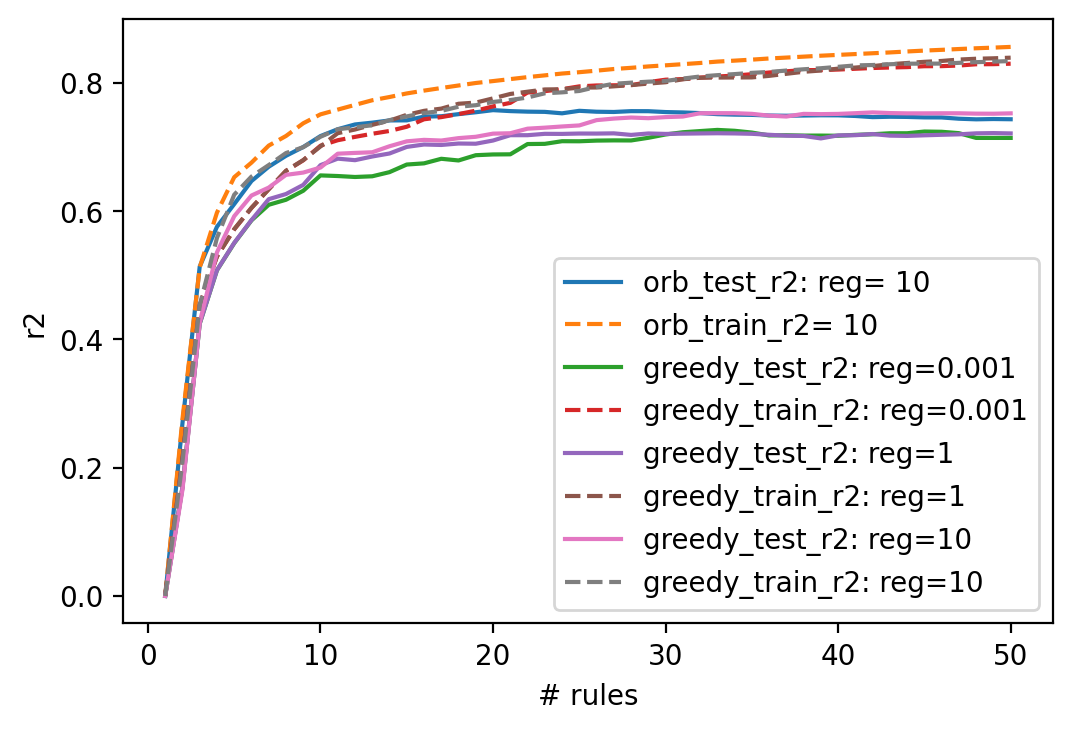

In [33]:
plt.figure(dpi=200)

max_grd_rules = max([len(grd.members) for grd in grds])

while len(orb_len_v_perf_test) < max_grd_rules:
    orb_len_v_perf_test = orb_len_v_perf_test.append(pd.Series(orb_len_v_perf_test.values[-1]), ignore_index=True)

while len(orb_len_v_perf_train) < max_grd_rules:
    orb_len_v_perf_train = orb_len_v_perf_train.append(pd.Series(orb_len_v_perf_train.values[-1]), ignore_index=True)
    
    
plt.plot(orb_len_v_perf_test.index[1:], orb_len_v_perf_test.values[1:], label='orb_test_r2: reg= ' + str(orb.reg))
plt.plot(orb_len_v_perf_train.index[1:], orb_len_v_perf_train.values[1:], label='orb_train_r2= ' + str(orb.reg), linestyle='--')

best_grd = None
best_grd_auc = None

used_regs = [0.001, 1, 10]

for grd in grds:
    if grd.reg not in used_regs:
        continue
    
    grd_len_v_perf_test = evaluation.ensemble_length_vs_perf(grd, r2_test)
    grd_len_v_perf_train = evaluation.ensemble_length_vs_perf(grd, r2_train)
    
    grd_auc_test = np.trapz(grd_len_v_perf_test.values, grd_len_v_perf_test.index) / len(grd_len_v_perf_test.index)
    if (best_grd == None) or (grd_auc_test > best_grd_auc):
        best_grd = deepcopy(grd)
        best_grd_auc = grd_auc_test
        
    while len(grd_len_v_perf_test) < max_grd_rules:
        grd_len_v_perf_test = grd_len_v_perf_test.append(pd.Series(grd_len_v_perf_test.values[-1]), ignore_index=True)

    while len(grd_len_v_perf_train) < max_grd_rules:
        grd_len_v_perf_train = orb_len_v_perf_train.append(pd.Series(grd_len_v_perf_train.values[-1]), ignore_index=True)

    
    plt.plot(grd_len_v_perf_test.index[1:], grd_len_v_perf_test.values[1:], label='greedy_test_r2: reg='+str(grd.reg))
    plt.plot(grd_len_v_perf_train.index[1:], grd_len_v_perf_train.values[1:], label='greedy_train_r2: reg='+str(grd.reg), linestyle='--')
plt.xlabel('# rules')
plt.ylabel('r2')
plt.legend()

print(str(len(orb.members)) + ' optimal rules: ')
for rule in orb.members:
    print(rule)
    
print('\n\n' + str(len(best_grd.members)) + ' greedy rules:')
for rule in best_grd.members:
    print(rule)

plt.savefig('Friedman_7d_rules_comp.pdf')
plt.show()